## Running image preprocessing (qptiff-split.ipynb) on the fourth cohort

K3

In [1]:
import tifffile as tff
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
from cv2 import imwrite
from PIL import Image
import pickle as pk

In [3]:
# get channel names
raw_ome = '../Data/20220617_Castleman_Disease_LN_FFPE_HVCD_2.qptiff'
tifim = tff.TiffFile(raw_ome)

markers=[]
for p in tifim.series[0].pages:
    tif_xml = p.tags['ImageDescription'].value
    tif_meta = ET.XML(tif_xml)
    marker = tif_meta.find("Biomarker").text
    markers.append(marker)

In [4]:
with open(r'../Data/CellSeg/channelNames_cohort3.txt', 'w') as fp:
    for item in markers:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


### Splitting K3 images

5 regions, 2 rows

In [2]:
raw_ome = '../Data/20220713 Kikuchi LN_K3.qptiff'
tifim = tff.TiffFile(raw_ome)
nregion = 5

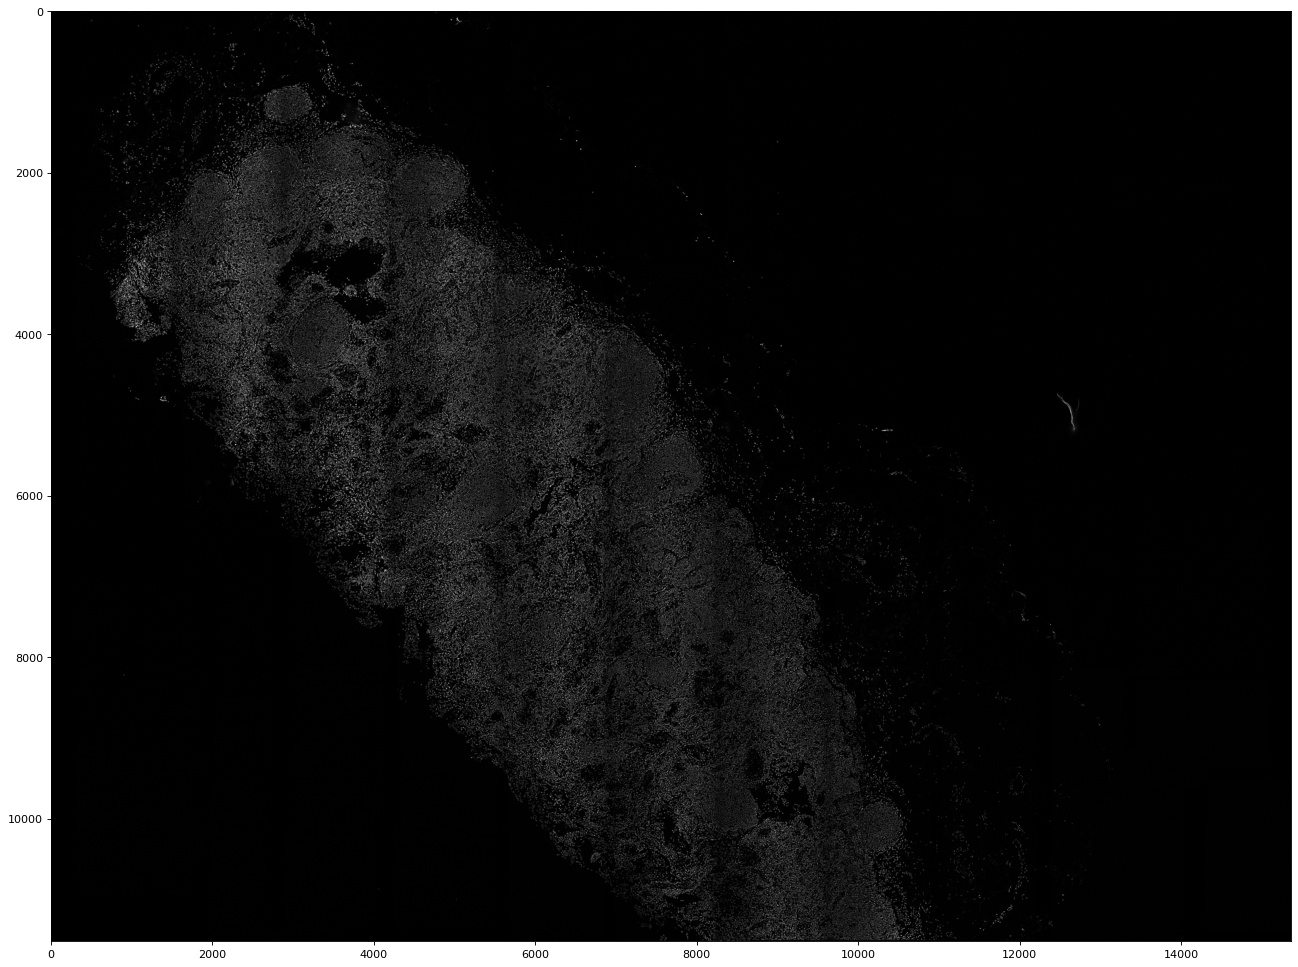

In [16]:
plt.figure(figsize=(20, 20), dpi=80)
test = tifim.series[0].pages[0].asarray()
plt.imshow(test, cmap='gray')

In [4]:
# tifim.series[0].shape
tifim.series[0].shape[1]/2

7520.0

In [5]:
tifim.series[0].shape[2]/3

10026.666666666666

In [6]:
p_im = tifim.series[0].asarray()
for i_region in range(nregion):
    if i_region < 3:
        out = p_im[ :, 0:7520 , (10026*i_region):(10026*i_region + 10026)]
    else:
        out = p_im[ :, 7520: , (10026*(i_region-3)):(10026*(i_region-3) + 10026)]
    out = np.expand_dims(out, axis=1)
    print(out.shape)
    tff.imwrite('../Data/CellSeg/input/K3_regions/K3_reg{}_input.tif'.format(i_region+1),
               out)

(44, 1, 7520, 10026)
(44, 1, 7520, 10026)
(44, 1, 7520, 10026)
(44, 1, 7520, 10026)
(44, 1, 7520, 10026)


### Splitting HVCD2 images

5 regions, 2 row

In [27]:
raw_ome = '../Data/20220617_Castleman_Disease_LN_FFPE_HVCD_2.qptiff'
tifim = tff.TiffFile(raw_ome)
nregion = 5

In [22]:
tifim.pages[0].shape[1]/3

10026.666666666666

In [23]:
tifim.pages[0].shape[0]/2

7520.0

In [28]:
for i_region in range(nregion):
    arrays = []
    for p in tifim.series[0].pages:
        tif_xml = p.tags['ImageDescription'].value
        tif_meta = ET.XML(tif_xml)
        p_im = p.asarray()
        if i_region < 3:
            out = p_im[ 0:7520 , (10026*i_region):(10026*i_region + 10026)]
            arrays.append(out)
        else:
            out = p_im[ 7520: , (10026*(i_region-3)):(10026*(i_region-3) + 10026)]
            arrays.append(out)
    out = np.stack(arrays, axis=0)
    out = np.expand_dims(out, axis=1)
    print(out.shape)
    with tff.TiffWriter('../Data/CellSeg/input/HVCD2_regions/HVCD2_reg{}_input.tif'.format(i_region+1)) as tif:
        tif.write(out)

(44, 1, 7520, 10026)
(44, 1, 7520, 10026)
(44, 1, 7520, 10026)
(44, 1, 7520, 10026)
(44, 1, 7520, 10026)


## Splitting MCD4

4 regions, 2 rows

This image seems to be too big for normal tiff writing.
Using this method:
https://stackoverflow.com/questions/62245475/how-to-save-a-very-large-numpy-array-as-an-image-loading-as-little-as-possible

In [23]:
tileshape = 512, 512

In [16]:
def tile_generator(data, tileshape):
    for y in range(0, data.shape[1], tileshape[0]):
        for x in range(0, data.shape[2], tileshape[1]):
            tile = data[:, y: y+tileshape[0], x: x+tileshape[1]]
            if tile.shape[:2] != tileshape:
                pad = (
                    (0, 0),
                    (0, 0),
                    (0, tileshape[0] - tile.shape[1]),
                    (0, tileshape[1] - tile.shape[2])
                )
                tile = np.pad(tile, pad, 'constant')
            yield tile

In [8]:
tifim.pages[0].shape[:2]

(19072, 38144)

In [3]:
raw_ome = '../Data/20220619_Castleman_Disease_LN_FFPE_M4.qptiff'
tifim = tff.TiffFile(raw_ome)
nregion = 4


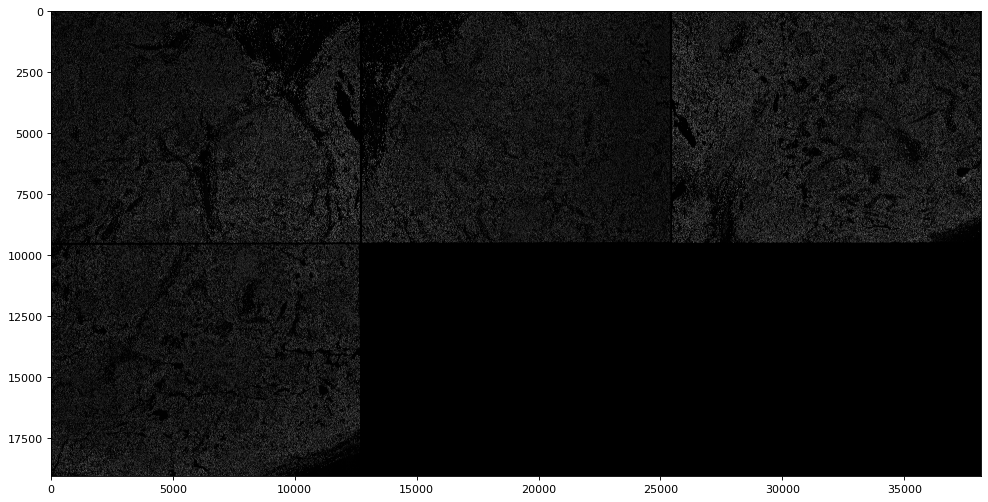

In [11]:
plt.figure(figsize=(15, 15), dpi=80)
test = tifim.series[0].pages[0].asarray()
plt.imshow(test, cmap='gray')

In [13]:
print(tifim.pages[0].shape[1]/3)
print(tifim.pages[0].shape[0]/2)

12714.666666666666
9536.0


In [21]:
p_im[2,5000:5050,5000:5050]

array([[19, 24, 14, ..., 16, 13, 30],
       [23, 18, 22, ..., 10, 24, 27],
       [27, 27, 21, ..., 20, 17, 17],
       ...,
       [14, 28, 15, ..., 22, 21, 14],
       [20, 14, 16, ..., 22, 20, 20],
       [24, 20, 16, ..., 20, 22, 17]], dtype=uint8)

In [25]:
# p_im = tifim.series[0].asarray()
for i_region in range(nregion):
    if i_region < 3:
        out = p_im[ :, 0:9536 , (12714*i_region):(12714*i_region + 12714)]
    else:
        out = p_im[ :, 9536: , (12714*(i_region-3)):(12714*(i_region-3) + 12714)]
    out = np.expand_dims(out, axis=1)
    print(out.shape)
    # with tff.TiffWriter('../Data/CellSeg/input/MCD4_regions/MCD4_reg{}_input.tif'.format(i_region+1)) as tif:
    #     tif.write(out)
    tff.imwrite('../Data/CellSeg/input/MCD4_regions/MCD4_reg{}_input.tif'.format(i_region+1),
               out,
               bigtiff=True)
    # tff.imwrite(
    #     '../Data/CellSeg/input/MCD4_regions/MCD4_reg{}_input.tif'.format(i_region+1), 
    #     tile_generator(out, tileshape),
    #     dtype='uint8', 
    #     shape=out.shape, 
    #     tile=tileshape,
    #     bigtiff=True)

(44, 1, 9536, 12714)
(44, 1, 9536, 12714)
(44, 1, 9536, 12714)
(44, 1, 9536, 12714)
